# Assignment 2

## Task 1

In this task I will convert this equation:

$$
m
\frac{d^{2}}{dt^{2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
=\
- \frac{GmM}{(x^{2} + y^{2})^{3/2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
$$

into a first-order form which will describe the time evolution of the location and velocity of the smaller body, {$x, y, v_x, v_y$}, so that we can solve it by using Runge-Kutta algorithms.

To get it to first form I define:
$$
\frac{d}{dt}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
=
\left(
\begin{array}{c}
v_x \\ v_y
\end{array}
\right)
$$

So that:
$$
\frac{d}{dt}
\left(
\begin{array}{c}
v_x \\ v_y
\end{array}
\right)
=
\frac{d^{2}}{dt^{2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
= 
- \frac{GmM}{(x^{2} + y^{2})^{3/2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
$$


So we can describe the time evolution of the location x and y and the velocity $v_x$ and $v_y$ of the smaller body with:

$$
\frac{d}{dt}
\left(
\begin{array}{c}
x \\ y \\ v_x \\ v_y
\end{array}
\right)
=
\left(
\begin{array}{c}
v_x \\ v_y \\ - \frac{GmMx}{(x^{2} + y^{2})^{3/2}} \\ - \frac{GmMy}{(x^{2} + y^{2})^{3/2}}
\end{array}
\right)
$$

Now we the equation on first-order form.

We know that the derivative of position with time is velocity, and the derivative of velocity with time ($v_x, v_y$) is acceleration.

### Imports
I have collected my import statements here, because of the simpliticy of knowning where to search and add more imports if needed. I will come back and explain these imports as I use them.

In [1]:
from scipy import integrate, optimize
import numpy as np
from matplotlib import pyplot as plt


## Task 2

In this task I will solve the differential equation from task one and use it to check if the orbit is stable for several periods.

From the assignment we knew that we should set GM $=4\pi^{2}$. Because this corresponds to a rescaling to units where time is in years, masses in solar masses and distance in astronomical units.

In [2]:
GM = 4 * np.pi**2

To solve this task I used scipy's functions $\textit{integrate.solve_ivp}$, which is imported at the beginning. That function takes an initial value and numerically integrates a system of ordinary differential equations. 

The first parameter in $\textit{integrate.solve_ivp}$ is a function, which I have called $\textit{diffFun}$. That function returns an array of four values, which is the four values $x, y, v_x, v_y$ as defined in task 1. 
In the code z is the array and z is defined as $z[0] = x,\ z[1] = y,\ z[2] = v_x,\ z[3] = v_y$. 

So the function returns this: 
$$
\frac{d}{dt}
\left(
\begin{array}{c}
x \\ y \\ v_x \\ v_y
\end{array}
\right)
=
\left(
\begin{array}{c}
z[2] \\ z[3] \\ - \frac{GmMz[0]}{(z[0]^{2} + z[1]^{2})^{3/2}} \\ - \frac{GmMz[1]}{(z[0]^{2} + z[1]^{2})^{3/2}}
\end{array}
\right)
$$

$\textit{integrate.solve_ivp}$ expects the function to take in a scalar $\textit{t}$ and the array, so the function does also take in $\textit{t}$, but that is not used.

The next parameter is the interval of integration. I have chosen the intervals to go from 0 to $15\pi$. I use $\pi$ because we are going in a circle and by using $\pi$ in the intervalls we will get periods that goes through the whole circle. In this task we want to check that the orbit is stable for several periods, and I check for 15 periods.

The third parameter is the initial state, which is told in the assignment to be: $${x(0), y(0), v_x(0), v_y(0)} = {1, 0, 0, 1.1 * 2\pi}$$ 

The parameter $\textit{method}$ is not needed because the default is already set to be RK45. RK45 is an explicit Runge-Kutta method of order 4 and 5.

The last parameter, $\textit{rtol}$, is the relative tolerance. This controls a relative accuracy. The default value for $\textit{rtol}$ is $1e-3$ which is to big in this case. Therefore I set it to be $1e-10$.
The absolute tolerance has the default value $1e - 6$, which is good in this case. Before I changed $\textit{rtol}$ the plot would not look like an ellipse. But more like a spiral.

In [3]:
def diffFun(t,z):
    return [z[2], z[3], -((GM*z[0])/(z[0]**2 + z[1]**2)**(3/2)), -((GM*z[1])/(z[0]**2 + z[1]**2)**(3/2))]

sol = integrate.solve_ivp(
    diffFun,                            # Right hand side of the system
    (0, 15*np.pi),                      # Interval of integration
    np.array([1,0,0, 1.1 * 2*np.pi]),   # Initial state
    method = "RK45",                    # Integration method, default is RK45
    rtol = 1e-10                        # Tolerance for the relative error
)

The function $\textit{integrate.solve_ivp}$ returns a bunch object with different fields. To plot the solution in the (x,y)-plane I use the field in the object which is called $y$. $y$ returns an array, that contains an array each for $x,\ y,\ v_x$ and $v_y$. We want to plot the position by using $x$ and $y$.

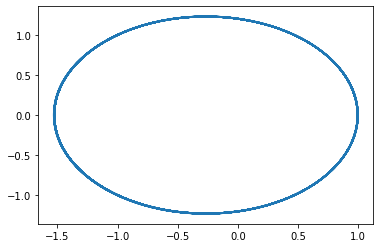

In [4]:
plt.plot(sol.y[0], sol.y[1])
plt.show()

As we can see in the plot. This is a stable orbit. We can not see that this plot is for several periods, because the answer is the same for every period and the graph is put on top of each other.

## Task 3

Kepler's first law:
$$\textit{The orbit of every planet is an ellipse with the Sun at one of the two foci}$$
In this task I will show that this is the case for my solution.

In [5]:
tlist = []
rlist = []
for i in range(len(sol.y[0])):
    x = sol.y[0][i]
    y = sol.y[1][i]
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    tlist.append(theta)
    rlist.append(r)

In [6]:
def rTheta(theta, p, e):
    return p / (1 + e*np.cos(theta))

In [7]:
parameters = optimize.curve_fit(rTheta, tlist, rlist)
p = parameters[0][0]
e = parameters[0][1]
print(p, e)

1.2099937727446837 0.20997508527825687


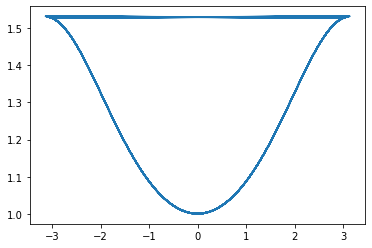

In [8]:
plt.plot(tlist, rlist)

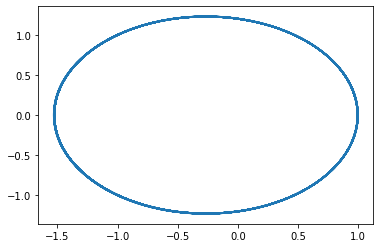

In [9]:
xax = rlist * np.cos(tlist)
yax = rlist * np.sin(tlist)
plt.plot(xax, yax)

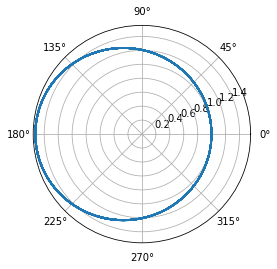

In [10]:
plt.polar(tlist, rlist)

## Task 4

In [11]:
def dA(theta, p, e):
    return ((p / (1 + e*np.cos(theta)))**2) / 2

start = 2
slutt = 4
areal1 = integrate.quad(dA, tlist[start], tlist[slutt], args=(p,e))
print(areal1)

start = 6
slutt = 8
areal2 = integrate.quad(dA, tlist[start], tlist[slutt], args=(p, e))
print(areal2)


(0.23256670538889637, 2.582009110839682e-15)
(0.28278317754800897, 3.1395239469046316e-15)


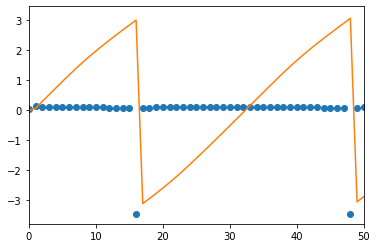

In [12]:
dt = np.roll(tlist,-1) - tlist
dA2 = (((p / (1 + e*np.cos(theta)))**2) / 2)*dt
plt.xlim(0, 50)
plt.plot(dA2, 'o')
plt.plot(tlist)

In [13]:
periodTime = 0
temp = 0
for i in range(len(sol.y[0])):
    if dA2[i] < -3:
        if temp > 0:
            periodTime = sol.t[i] - temp
            break
        temp = sol.t[i]
print(periodTime)

1.4438362050929139


In [14]:
a = p / (1 - e**2)
time = np.sqrt(a**3)
print(time)

1.4241275223220573


In [15]:
ratio = time**2/a**3
print(ratio)

0.9999999999999998


In [16]:
ratio2 = periodTime**2/a**3
print(ratio2)

1.027869777038252


Task 5

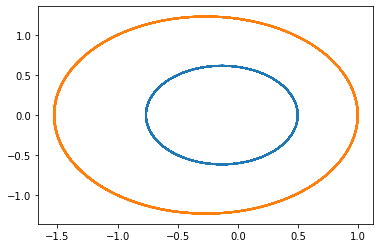

In [17]:
sol2 = integrate.solve_ivp(diffFun, (0, 12*np.pi), np.array([0.5,0,0, 1.1 * 2*np.pi*np.sqrt(2)]), method="RK45", rtol  = 1e-10 )
plt.plot(sol2.y[0], sol2.y[1])
plt.plot(sol.y[0], sol.y[1])

1.2099937727446837 0.6049948873504372
0.5035026186448204
1.0


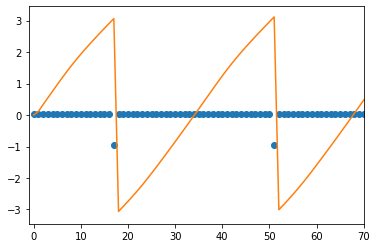

In [18]:
def rTheta_e(theta, p):
    return p / (1 + 0.20997997309449343*np.cos(theta))

tlist2 = []
rlist2 = []
rtlist2 = []
for i in range(len(sol2.y[0])):
    x2 = sol2.y[0][i]
    y2 = sol2.y[1][i]
    r2 = np.sqrt(x2**2 + y2**2)
    theta2 = np.arctan2(y2, x2)
    tlist2.append(theta2)
    rlist2.append(r2)

parameters2 = optimize.curve_fit(rTheta_e, tlist2, rlist2)
p2 = parameters2[0][0]

rt2 = rTheta(tlist2, p2, e)
dt2 = np.roll(tlist2,-1) - tlist2
dA22 = (((p2 / (1 + e*np.cos(theta2)))**2) / 2)*dt2

plt.xlim(-1, 70)
plt.plot(dA22, 'o')
plt.plot(tlist2)
print(p, p2)
a = p2 / (1 - e**2)
time = np.sqrt(a**3)
print(time)
ratio = time**2/a**3
print(ratio)